In [24]:
%matplotlib inline
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt


In [25]:
G = nx.read_gml("nepotismo.gml")
print(G.order())
print(G.size())

7529
9978


In [26]:
pessoas = []
orgaos = []

for node in G.nodes:
    if node[0:3] == "CPF":
        pessoas.append(node)
    else:
        orgaos.append(node)

print(len(pessoas))
print(len(orgaos))
len(pessoas) + len(orgaos)

7323
206


7529

In [27]:
def search_cycles(H, source):
    finished = []
    all_cycles = []
    set_nodes = set()
    paths = []
    def search_cycles_und(W, node, cycle_list, path):
        aux_lst = cycle_list + [node]
        for v in W.neighbors(node):
            if v == aux_lst[0] and len(aux_lst) > 2:
                #print(path + [(node, W.edges[node, v]["etiqueta"], v)])
                all_cycles.append(aux_lst)
                paths.append(path + [(node, W.edges[node, v]["etiqueta"], v)])
            elif v not in finished and v not in aux_lst:
                #print((node,W.edges[node, v]["etiqueta"],v))
                search_cycles_und(W, v, aux_lst, path + [(node, W.edges[node, v]["etiqueta"], v)])
        finished.append(node)
    search_cycles_und(H, source, [], [])
    for cly in all_cycles:
        set_nodes = set_nodes | set(cly)
    return all_cycles, set_nodes, paths

In [28]:
#from networkx examples
def plot_cycle(T, node_list, main, save_name=None):

    pos = nx.spring_layout(T)  # positions for all nodes
    
    plt.figure(1,figsize=(30,30))
    nx.draw_networkx_nodes(T, pos,
                           nodelist=[node_list[node_list.index(main)]],
                           node_color='r',
                           node_size=500,
                           alpha=0.8)
    nx.draw_networkx_nodes(T, pos,
                           nodelist=node_list[0:node_list.index(main)] + node_list[node_list.index(main)+1:],
                           node_color='b',
                           node_size=500,
                           alpha=0.8)

    # edges
    nx.draw_networkx_edges(T, pos, width=1.0, alpha=0.5)


    # some math labels
    node_labels = {}
    for el in node_list:
        if "label" in T.node[el]:
            node_labels[el] = T.node[el]["label"]
        else:
            node_labels[el] = el
        
    edge_labels = nx.get_edge_attributes(T,'etiqueta')
    nx.draw_networkx_labels(T, pos, node_labels, font_size=10)
    nx.draw_networkx_edge_labels(T, pos, edge_labels, font_size=10)

    plt.axis('off')
    if save_name is not None:
        plt.savefig(save_name)
    else:
        plt.show()
    plt.clf()


In [29]:
print(orgaos[1])
print(len([orgaos[1]] + pessoas))
H = G.subgraph([orgaos[1]] + pessoas)
print(H.order())
print(H.size())

ORG64496eb62b7cc97adb86af9c958c5f2e
7324
7324
6511


In [30]:
H = G.subgraph([orgaos[1]] + pessoas)
all_cycles, set_nodes, paths = search_cycles(H, orgaos[1])
print(all_cycles)
print(paths)

[]
[]


In [31]:
print(orgaos[10])
print(len([orgaos[10]] + pessoas))
H = G.subgraph([orgaos[10]] + pessoas)
print(H.order())
print(H.size())

ORG69be851fccb3ed590aaed157a62221ee
7324
7324
6560


In [32]:
H = G.subgraph([orgaos[10]] + pessoas)
all_cycles, set_nodes, paths = search_cycles(H, orgaos[10])
print(all_cycles[:5])
print(paths)


[['ORG69be851fccb3ed590aaed157a62221ee', 'CPF53266edd51b8cad24de4b7d9f354117c', 'CPF5f2d9d36107cb0cce88d266796e03f85', 'CPF91bed0852c7c4372abefc5c0d672ed73'], ['ORG69be851fccb3ed590aaed157a62221ee', 'CPF0bcf9f851069a5ccb7282a8b8f403ee2', 'CPF28851f1a60a44bfcd4a2102b366d9f93', 'CPF87838365231ac8d3e2889da81c62a6e9'], ['ORG69be851fccb3ed590aaed157a62221ee', 'CPFd779bd8f2c504f0c5ec4082261a9fbfb', 'CPFbb6159dc3cf8aea6764f008b25a79bd4', 'CPFd9a0c27bbdfa4b55294bf5de099fb4d5', 'CPF94a2a3e4add9e2dedb55d9e591ed9ed2'], ['ORG69be851fccb3ed590aaed157a62221ee', 'CPFd779bd8f2c504f0c5ec4082261a9fbfb', 'CPFbb6159dc3cf8aea6764f008b25a79bd4', 'CPF72e61af2895c4b6c80af6fd7a40edf3e'], ['ORG69be851fccb3ed590aaed157a62221ee', 'CPF2e91e9b044fb7094aa4833f5ff27ee54', 'CPF567c7dc225b62bded9e5f20f3f2f7871', 'CPF7815964828dcfa627e367a46fec0da50', 'CPFb6c0616b1186703920489abd54eb10cc', 'CPF79311ada6185939036357cc0acfa80c5']]
[[('ORG69be851fccb3ed590aaed157a62221ee', 'vinculado ao', 'CPF53266edd51b8cad24de4b7d9f35411

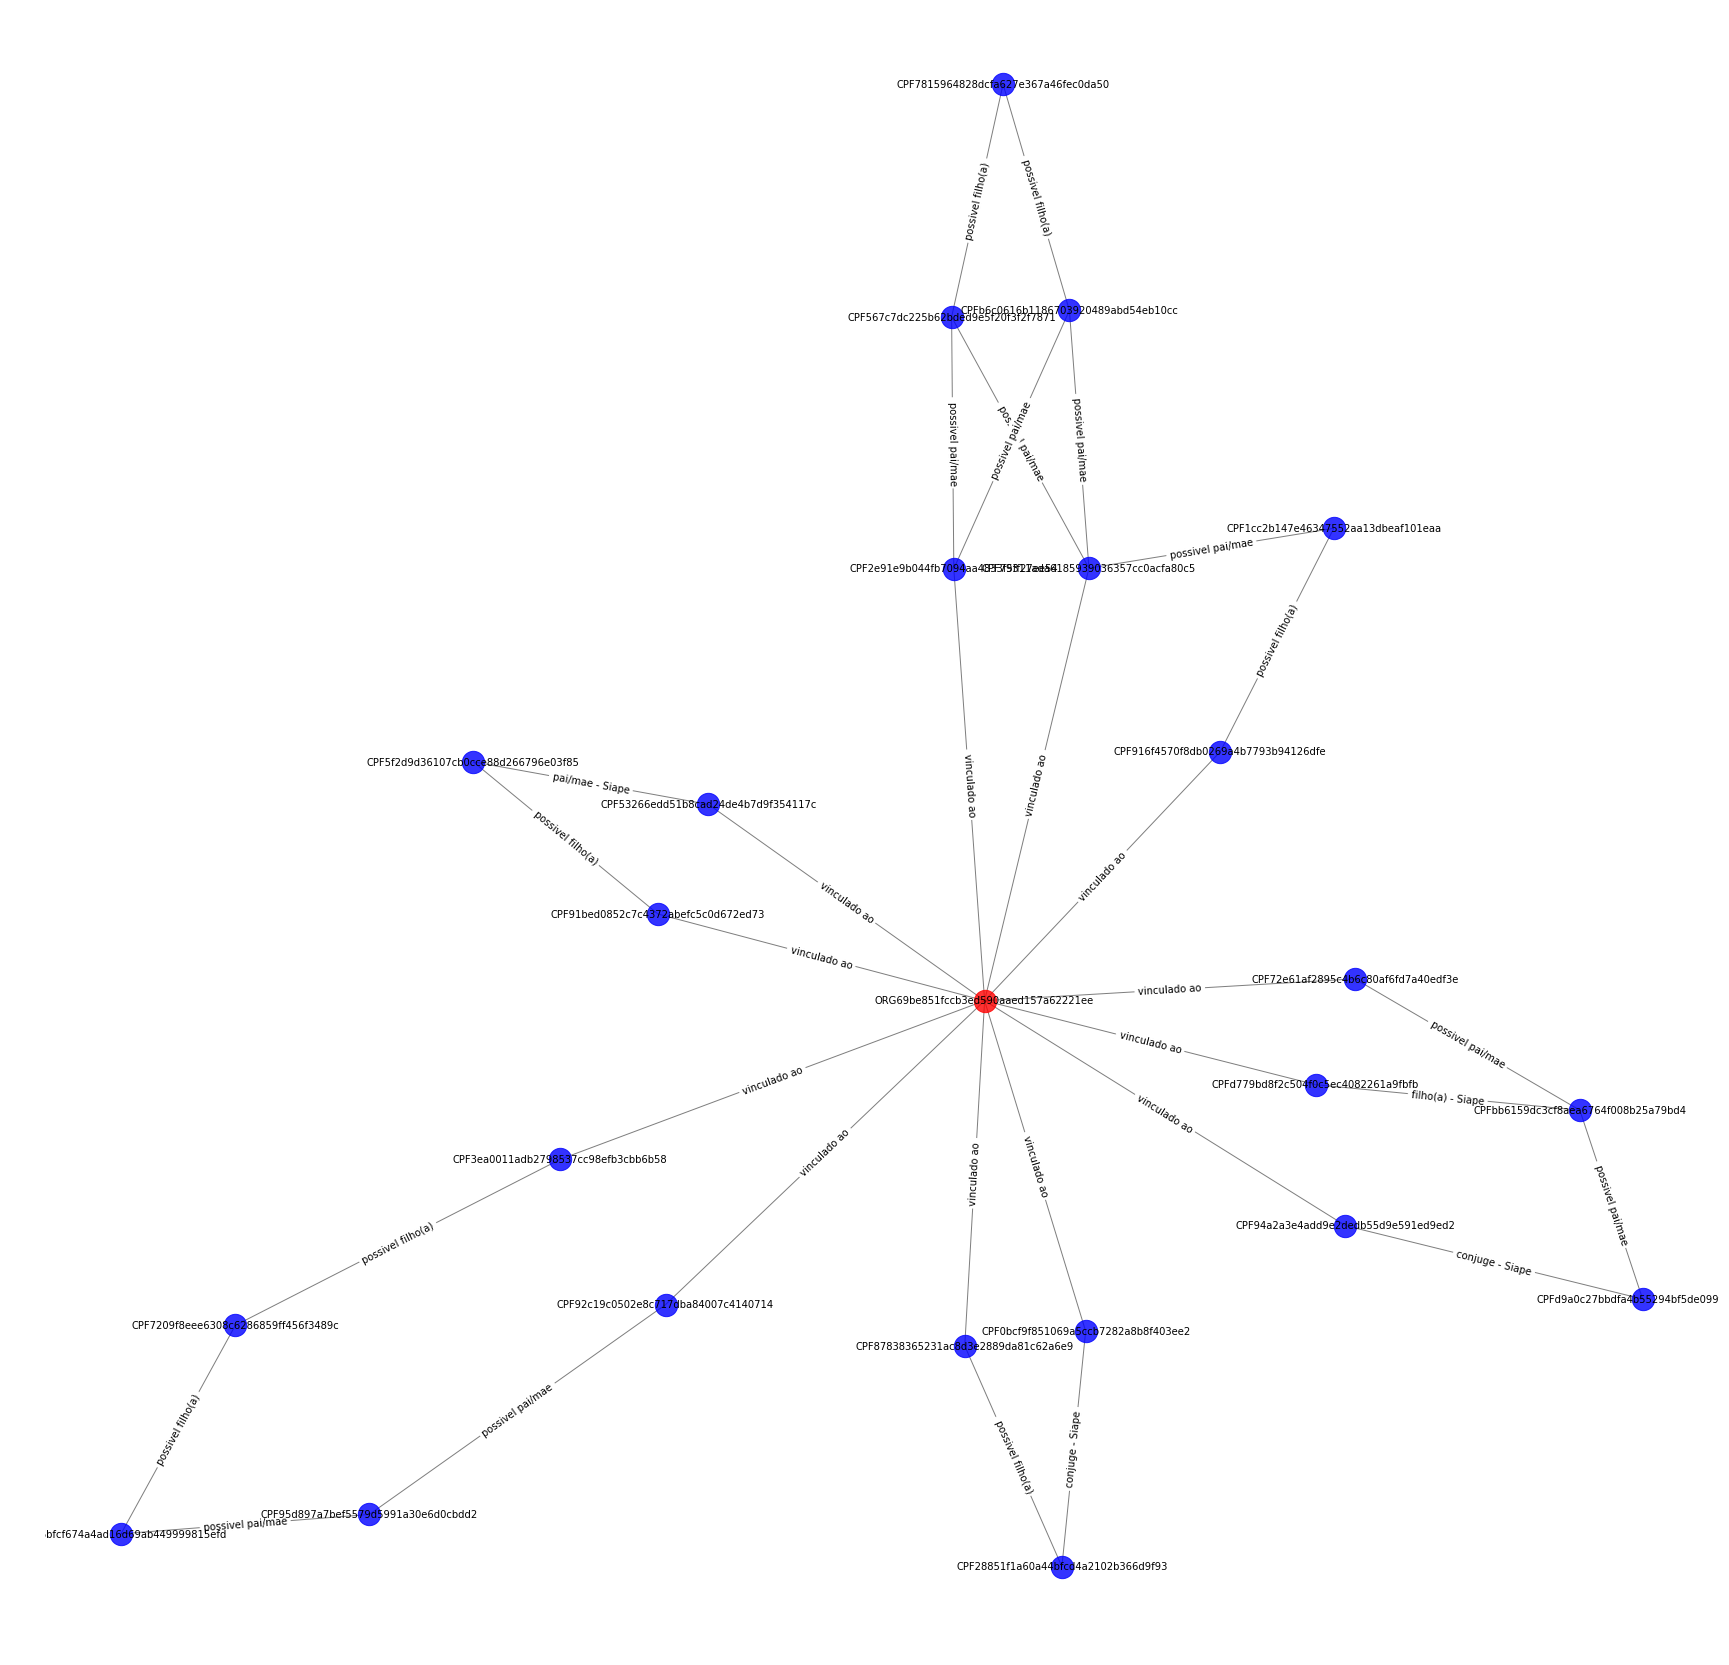

<Figure size 432x288 with 0 Axes>

In [33]:
T = G.subgraph(set_nodes)
plot_cycle(T, list(set_nodes), all_cycles[0][0], None)


In [34]:
links = open('links.dat', 'w')
all_lks = open('all.dat', 'w')
all_lks.write("a;vinculo;b")
all_lks.write("\n")
for orgao in orgaos:
    H = G.subgraph([orgao] + pessoas)
    all_cycles, set_nodes, paths = search_cycles(H, orgao)
    if len(all_cycles) > 0:
        T = G.subgraph(set_nodes)
        nx.write_edgelist(T, path="resultados/" + orgao + ".csv", delimiter=";")
        plot_cycle(T, list(set_nodes), all_cycles[0][0], save_name="resultados/" + orgao + ".png")
        links.write(str(paths))
        for path in paths:
            for edge in path:
                aux = ""
                for el in edge:
                    aux = aux + el + ";"
                all_lks.write(aux)
                all_lks.write("\n")
        links.write("\n")

links.close()
all_lks.close()

<Figure size 2160x2160 with 0 Axes>